## EPS/ESE 135: Observing the Ocean
### Data Analysis Assignment 1: Intro to plotting data with Python

Throughout the semester, you will learn about many different types of oceanographic data, and your final project will involve working with a group to analyze and present an oceanographic data set. This assignment is your first opportunity to practice manipulating and visualizing oceanographic data using Python.

#### Working with Jupyter notebooks

This is a Jupyter Notebook, a Python IDE (integrated development environment) that is based around "cells," which can contain snippets of code or text. Jupyter notebooks are a versatile tool that can be useful for learning how code works, exploring a data set, or describing analysis steps and results using these integrated markdown text cells...which also makes them good for tutorials.

You should be able to download a copy of this file (`01_python_intro.ipynb`) and run it on your own machine to replicate and build on the results shown.

There are a few ways to create new cells, including by clicking the + sign at the top of the notebook, or by using one of the + icons inside the active cell to duplicate the current cell or create a new one above or below.

When you create a new cell, make sure that Jupyter interprets it correctly by selecting either "Markdown" (rich text), "raw" (plain text), or "code" from the dropdown menu at the top. Then you can execute the cell, which will format the text or run the code, by clicking the single forward arrow at the top or by pressing command + enter (on a Mac).

There are many online resources with more explanation, keyboard shortcuts, Markdown tips, etc...here is one [Jupyter tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) to get you started if you're looking for more information.

#### The kernel

When you run Python code in a Jupyter notebook it creates a "kernel," which is basically a contained computational environment for your calculations. Because Python is modular, the first thing you have to do is import the libraries that you will call in your code. Those libraries need to exist in the Python environment you are working with (e.g. our `eps135` environment) so that you can import them.

When you create or manipulate variables these are also stored in the kernel until it is reset. You can restart the kernel using the _Kernel_ menu or by clicking on the circular arrow at the top of the notebook. If you do this (or if you close and reopen the file), you will need to rerun all the code, including the first step of importing your code libraries.

#### Importing Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

By using the `import ... as` syntax, we've created an alias for each of these packages. There's nothing stopping you from calling them something else, but these are incredibly commonly used, and it will make it much easier to share code if you stick to these conventions.

#### Basic calculations

For starters, you can use Python as an overpowered calculator. Basic mathematical operations are built in.

In [2]:
12 * 87 + 22 / 7

1047.142857142857

In [3]:
10 ** 2 #you can also add in-line comments like this

100

This starts to get more useful when you save variables. We will create a simple numpy array from a list of integers --- to learn more about numpy, check out this [numpy primer from Project Pythia](https://foundations.projectpythia.org/core/numpy/numpy-basics/).

In [4]:
a = np.array([12, 17, 25, 20, 19, 20, 16, 15, 21, 22]) # creates a numpy array
print(a) # displays the value of variable a

[12 17 25 20 19 20 16 15 21 22]


Now variable `a` is stored in the kernel and can be manipulated.

In [5]:
# Basic mathematical operations:
print(a*2)

# Statistical calculations:
print(np.min(a)) # minimum value
print(np.mean(a)) # mean value
print(np.std(a)) # standard deviation

[24 34 50 40 38 40 32 30 42 44]
12
18.7
3.5791060336346563


If the values in `a` are temperatures in degrees Celsius, we can define a function that will convert these to Fahrenheit. (You don't need to define a function to do a calculation once, but if you plan to do it many times, this can streamline your code and help avoid errors.)

In [6]:
# this is the syntax to define a function
def c_to_f(temp_c):
    temp_f = temp_c * 9/5 + 32
    return temp_f

b = c_to_f(a)
print(b)

[53.6 62.6 77.  68.  66.2 68.  60.8 59.  69.8 71.6]


### Please install Python on your laptop and run cells up to this point before class on Thursday, Sept 11.

Okay, your turn:
__Create a new code cell below. Define a function called `f_to_c` that takes the temperature in Fahrenheit as its input and returns the Celsius temperature. Test your function by using the variable `b` as the input. You may call the output `c` or pick a more creative variable name. Verify that your function works as expected by comparing the output to our initial array, `a`.__

#### Plotting data

[Matplotlib](https://matplotlib.org/) is a powerful tool for visualizing data with Python. It is also quite well-documented and there are many helpful examples on their website. Again, [Project Pythia's tutorial](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics/) is a great starting point if you'd like to learn more.

At its most basic, though, we can create a line plot by calling `plt.plot(___)`, which will be shown inline by Jupyter.

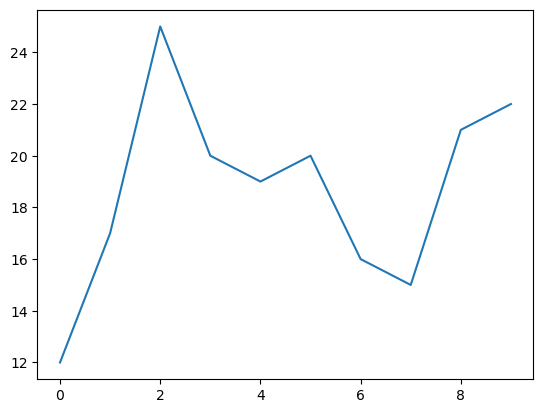

In [7]:
plt.plot(a)

Exciting, but what does it mean?? Let's say these values are the daily high temperatures in Boston over 10 days (maybe in April when the weather is very chaotic). We need to create a time variable to plot along the x-axis, and add axis labels so the viewer knows how to read the plot.

Text(0, 0.5, 'daily high temperature [deg C]')

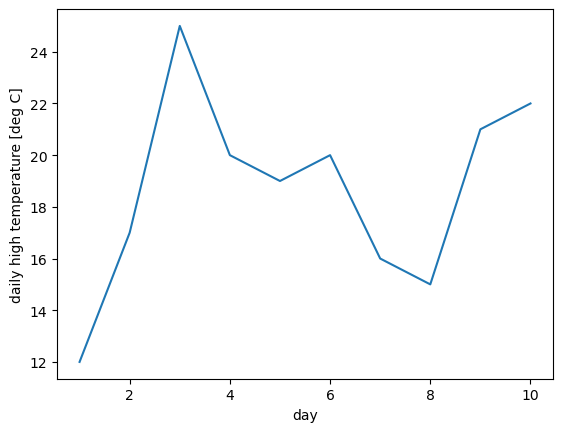

In [8]:
# define time variable:
time = np.arange(1,11) # this creates an array of integers from 1 to 10

# plot data:
plt.plot(time, a) # plots time on the x axis and a (temp) on the y axis

# add axis labels: 
plt.xlabel('day')
plt.ylabel('daily high temperature [deg C]')

There are lots of other choices you can make in creating your plots once you've covered these basics, such as changing colors, adding markers, grid lines, etc. which are covered in the tutorial and documentation linked above.

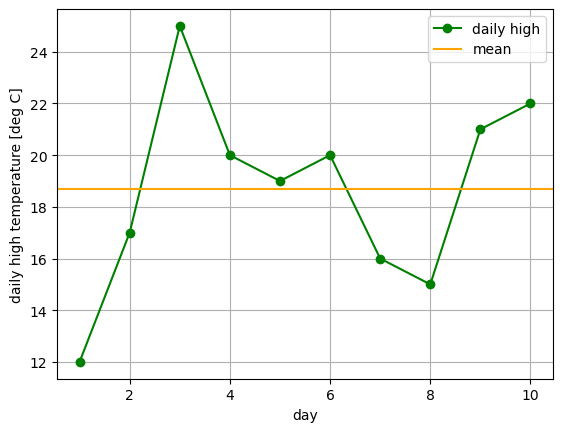

In [9]:
# plot data:
# the additional arguments specify line color, add a circle marker,
# and tell matplotlib what label to give this line in the legend
plt.plot(time, a, color='green', marker='o',label='daily high')

# plot a horizontal line at the mean value:
plt.axhline(np.mean(a), color='orange', label='mean')

# add axis labels: 
plt.xlabel('day')
plt.ylabel('daily high temperature [deg C]')

# add grid lines:
# this function doesn't need arguments, but we still need to give it
# the empty parentheses
plt.grid() 

# add legend:
# the labels we specified earlier will show up in the legend and it 
# will automatically try to put it somewhere on the axis where it's not
# covering up our data
plt.legend()

#### Loading and plotting timeseries data

In [10]:
def matlab_datenum_to_datetime(dn):
    """
    Convert a single MATLAB datenum (float) to Python datetime.
    """
    return datetime.fromordinal(int(dn)) + timedelta(days=dn % 1) - timedelta(days=366)

def convert_series(dn_series):
    """
    Convert a Pandas Series of MATLAB datenum values to datetime.
    """
    return dn_series.apply(matlab_datenum_to_datetime)

In [11]:
cf3 = pd.read_csv('timeseries.csv')
cf3.time = convert_series(cf3.time)
cf3

,time,temp,pres
0,2017-04-01 00:00:00.000000,3.528861,184.136111
1,2017-04-01 00:15:00.000027,3.556870,184.022124
2,2017-04-01 00:29:59.999973,3.570485,183.856186
3,2017-04-01 00:45:00.000000,3.582087,183.770099
4,2017-04-01 01:00:00.000027,3.580502,183.619164
...,...,...,...
35035,2018-03-31 22:45:00.000027,3.663301,183.351141
35036,2018-03-31 22:59:59.999973,3.659005,183.194176
35037,2018-03-31 23:15:00.000000,3.651609,183.028191
35038,2018-03-31 23:30:00.000027,3.653198,182.899140


Text(0, 0.5, 'temperature [deg C]')

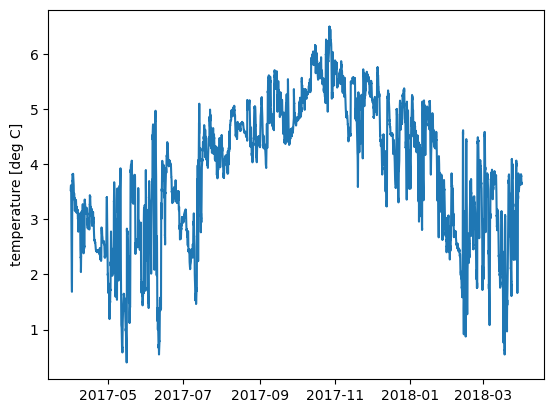

In [12]:
plt.plot(cf3.time,cf3.temp)
plt.ylabel('temperature [deg C]')

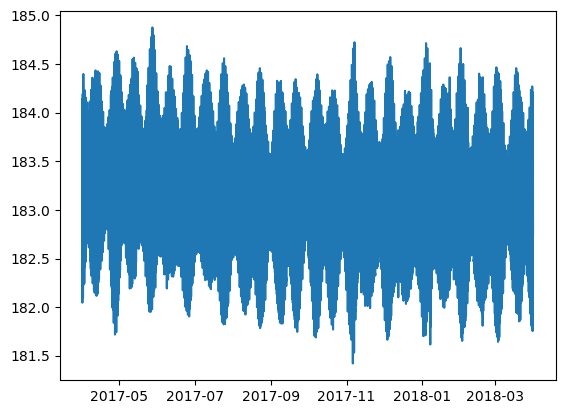

In [13]:
plt.plot(cf3.time,cf3.pres)

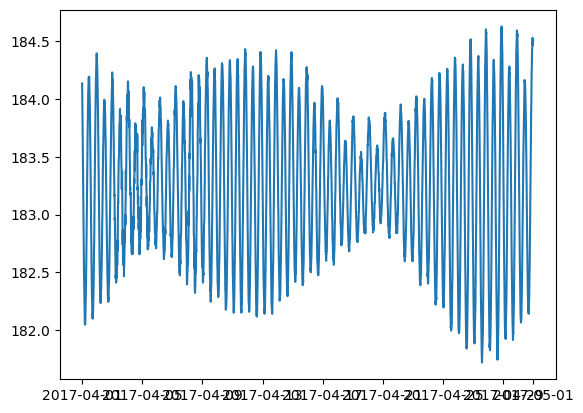

In [14]:
plt.plot(cf3.time[:96*30],cf3.pres[:96*30])

#### Loading and plotting profile data

In [15]:
ctd = pd.read_csv('ctd_raw.csv')
ctd

,pres,temp,sal
0,1.346000,4.028200,28.639988
1,2.007944,4.197800,28.838233
2,3.139750,5.358433,30.141808
3,4.045600,5.729352,30.936060
4,4.966909,5.765445,31.389000
...,...,...,...
463,469.171769,4.477615,34.778523
464,470.181538,4.477400,34.778969
465,471.236308,4.477392,34.778885
466,472.232286,4.477336,34.778786


(500.0, -5.0)

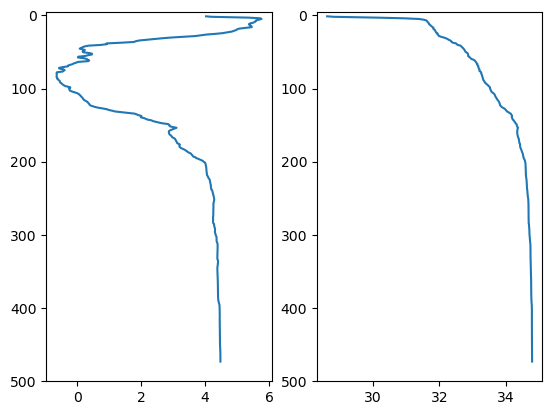

In [16]:
fig,ax = plt.subplots(1,2)
ax[0].plot(ctd.temp,ctd.pres)
ax[0].set_ylim([500,-5])

ax[1].plot(ctd.sal,ctd.pres)
ax[1].set_ylim([500,-5])